#Lab 4

##Importing Libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as sl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
import matplotlib.colors as mcolors

##Problem 1


###Part 1 and Part 2


In [3]:
iris_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=['Sepal length','Sepal width','Petal length','Petal width','Class'])
# lab_enc=LabelEncoder()
# iris_data['Class']=lab_enc.fit_transform(iris_data['Class'])
iris_data.dropna(inplace=True)
iris_data

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<ipython-input-206-d3fd6c4df62a>:106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(pred==y_test[i]):


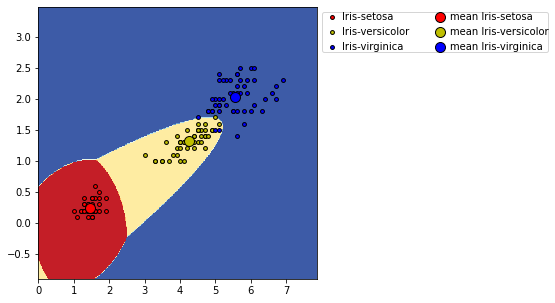

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'I

In [206]:
class GaussianNaiveScratch:

  
  #constructor 
  def __init__(self,clf_type):
    try:
      assert clf_type in [1,2,3]
      self.clf_type=clf_type
    except:
      print("please enter a valid clf_type\n1\tif covariance matrix is same for all classes and features are independent\n2\tif covariance matrix is same for all classes\n3\tif covariance matrix is not same for all classes")
  def __cal_covariance_scratch(self,X,Y):
    mean_x=np.mean(X)
    mean_y=np.mean(Y)
    temp_X=X-mean_x
    temp_Y=Y-mean_y
    temp=np.multiply(temp_X,temp_Y)
    return sum(temp)/(len(temp)-1)

  def __cal_cov_matrix(self,X):
    cov_mat=np.zeros((X.shape[1],X.shape[1]))
    for i in range(X.shape[1]):
      for j in range(X.shape[1]):
        cov_mat[i][j]=self.__cal_covariance_scratch(X[:,i],X[:,j])
    return cov_mat
  
  def __cal_class_mean(self,X,Y):
    cm=np.zeros((len(self.classes),X.shape[1]))
    for class_no,class_name in enumerate(self.classes):
      idx=np.where(Y==class_name)
      cm[class_no]=np.mean(X[idx],axis=0)
    return cm

  def __cal_class_probs(self,Y):
    out=np.zeros(self.classes.shape)
    for class_no,class_name in enumerate(self.classes):
      idx=np.where(Y==class_name)
      out[class_no]=len(idx[0])/len(Y)
    return out

    

  def __likelihood(self,sample,mean,cov):
    
    d = sample.shape[0]
    det = np.linalg.det(cov)
    

    inv = np.linalg.inv(cov)
    constant = np.power(2 * np.pi, -d/2) / np.sqrt(det)
    exp = np.exp(-0.5 * np.dot(np.dot((sample - mean).T, inv), (sample - mean)))
    return constant * exp
    

  

  def train(self,X,Y):
    self.classes=np.unique(Y)
    self.class_probs=self.__cal_class_probs(Y)
    
    self.class_mean=self.__cal_class_mean(X,Y)
    if(self.clf_type==1):
      self.class_cov=(self.__cal_covariance_scratch(X[:,0],X[:,0]))*np.identity(X.shape[1])
      
    elif(self.clf_type==2):
      self.class_cov=self.__cal_cov_matrix(X)
    else:
      temp=np.zeros((len(self.classes),X.shape[1],X.shape[1]))
      for class_no,class_name in enumerate(self.classes):
        temp[class_no]=self.__cal_cov_matrix(X[Y==class_name])
      self.class_cov=temp
      

      
  def predict(self,sample):
    
    if(self.clf_type in [1,2]):
      class_probs = []
      for i, c in enumerate(self.classes):
          mean = self.class_mean[i]
          cov = self.class_cov
          class_prob = self.__likelihood(sample, mean, cov) * self.class_probs[i]
          class_probs.append(class_prob)
      
      return self.classes[np.argmax(class_probs)]
    else:
      class_probs = []
      for i, c in enumerate(self.classes):
          mean = self.class_mean[i]
          cov = self.class_cov[i]
         
          class_prob = self.__likelihood(sample, mean, cov) * self.class_probs[i]
          class_probs.append(class_prob)
      
      return self.classes[np.argmax(class_probs)]

    


  def test(self,x_test,y_test):
    cnt=0
    preds=[]
    for i in range(x_test.shape[0]):
      pred=self.predict(x_test[i])
      preds.append(pred)

      if(pred==y_test[i]):
        cnt+=1
    return preds,(cnt/x_test.shape[0])

  def plot_decision_boundary( self,X, y, plot_step=0.02,colors='ryb'):
    clf=GaussianNaiveScratch(self.clf_type)
    clf.train(X,y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    

    temp,grb = clf.test(np.c_[xx.ravel(), yy.ravel()],np.zeros((np.c_[xx.ravel(),yy.ravel()].shape[0],1)))
    Z = [np.where(clf.classes==class_name)[0][0] for class_name in temp]
    Z=np.array(Z)
    # print(Z,type(Z))
    # Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    # plt.xlim(xx.min(), xx.max())
    # plt.ylim(yy.min(), yy.max())
    # plt.show()
    for i, color in zip(range(len(clf.classes)), colors):
      idx = np.where(y == self.classes[i])
      plt.scatter(X[idx, 0], X[idx, 1], c=color, label=clf.classes[i],
                  cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    for i,color in zip(range(len(clf.class_mean)),colors):
      # print(mean)
      mean=clf.class_mean[i]
      plt.scatter(mean[0],mean[1],c=color,label='mean '+str(clf.classes[i]),s=100,cmap=plt.cm.RdYlBu,edgecolor='black')
    plt.legend(loc='upper left', borderpad=0, handletextpad=0, bbox_to_anchor=(1, 1),ncol=2)
    plt.axis("tight")
    plt.show()


      
    


    
    
    
    
    
# testing the code whether it is working fine

clf=GaussianNaiveScratch(3)
clf.train(iris_data.iloc[:,:-1].to_numpy(),iris_data['Class'].to_numpy())
y_pred,accuracy=clf.test(iris_data.iloc[:,:-1].to_numpy(),iris_data['Class'].to_numpy())
clf.plot_decision_boundary(iris_data.iloc[:,2:4].to_numpy(),iris_data['Class'].to_numpy())
print(y_pred,'\n',accuracy)


# for i in range(len(iris_data.columns)-1):

#   new_clf=GaussianNaiveScratch(1)
#   new_clf.train(iris_data.iloc[:,i:i+2].to_numpy(),iris_data['Class'].to_numpy())
#   new_clf.plot_decision_boundary(iris_data.iloc[:,i:i+2].to_numpy(),iris_data['Class'].to_numpy())
# print(clf.predict(iris_data.iloc[0,:-1].to_numpy()))
# print(np.cov(iris_data.iloc[:,:-1],rowvar=False))
# temp=np.array([])
# temp=np.append(temp,[1,2,3])
# temp



###Part 3

In [28]:
X=iris_data.drop('Class',axis=1).to_numpy()
y=iris_data['Class'].to_numpy()
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,shuffle=True)
print(X_train.shape,X_test.shape)


(120, 4) (30, 4)


Accuracy for first model 0.9666666666666667
Accuracy for second model 0.8
Accuracy for third model 1.0


<ipython-input-4-d0631af4dffe>:106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(pred==y_test[i]):


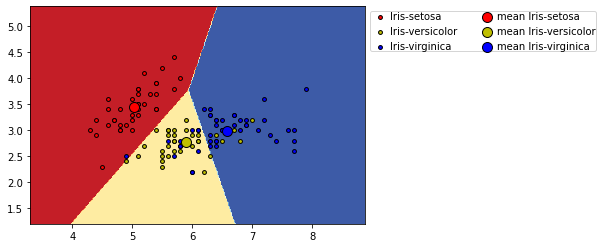

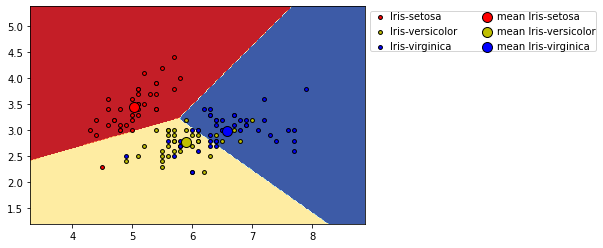

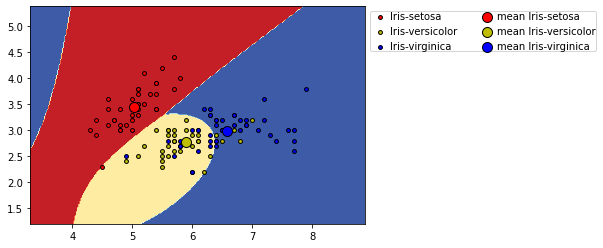

In [29]:
clf_1 = GaussianNaiveScratch(1)
clf_2 = GaussianNaiveScratch(2)
clf_3 = GaussianNaiveScratch(3)

clf_1.train(X_train,y_train)
clf_2.train(X_train,y_train)
clf_3.train(X_train,y_train)

pred_1,acc_1 = clf_1.test(X_test,y_test)
pred_2,acc_2 = clf_2.test(X_test,y_test)
pred_3,acc_3 = clf_3.test(X_test,y_test)

print("Accuracy for first model",acc_1)
print("Accuracy for second model",acc_2)
print("Accuracy for third model",acc_3)


clf_1.plot_decision_boundary(X_train[:,:2],y_train)
clf_2.plot_decision_boundary(X_train[:,:2],y_train)
clf_3.plot_decision_boundary(X_train[:,:2],y_train)

###Part 4

In [37]:
def crossValidation(clf,X,y,k):
  n_samples,n_features = X.shape
  fold_size=n_samples//k
  indices=np.arange(n_samples)
  np.random.shuffle(indices)
  scores=[]
  for fold in range(k):
    test_start_ind=fold*fold_size
    test_end_ind=(fold+1)*fold_size
    test_indices=indices[test_start_ind:test_end_ind]
    X_test=X[test_indices,:]
    y_test=y[test_indices]
    X_train=np.delete(X,test_indices,axis=0)
    y_train=np.delete(y,test_indices,axis=0)
    clf.train(X_train,y_train)
    scores.append(clf.test(X_test,y_test)[1])
  return scores

for index,clf in enumerate([clf_1,clf_2,clf_3]):
  # scores=crossValidation(clf,iris_data.iloc[:,:-1].to_numpy(),iris_data.iloc[:,-1].to_numpy(),5)
  scores=crossValidation(clf,X,y,5)
  print('score array for ',index,'is',scores)
  print('mean score',np.mean(scores))
  print('variance',np.var(scores))
  

  

score array for  0 is [0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9]
mean score 0.9266666666666667
variance 0.0019555555555555546
score array for  1 is [0.7, 0.9333333333333333, 0.9, 0.8333333333333334, 0.7333333333333333]
mean score 0.82
variance 0.008266666666666672
score array for  2 is [0.9666666666666667, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333]
mean score 0.9666666666666668
variance 0.0008888888888888885


###Part 5

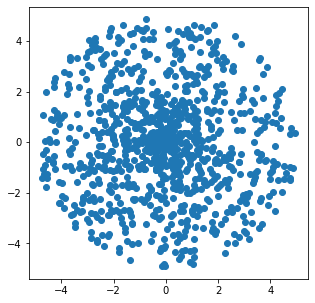

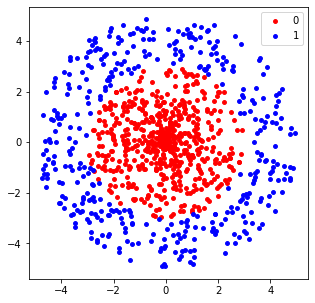

In [194]:
def generate_datapoints(r,n):
  theta=np.random.uniform(0,2*np.pi,n)
  rad=np.random.uniform(0,r,n)
  x = rad * np.cos(theta)
  y = rad * np.sin(theta)
  X = np.column_stack((x, y))
  return X

def distance(x,y):
  dis=pow(x,2)+pow(y,2)
  dis=pow(dis,0.5)
  return dis



datapoints_x=generate_datapoints(5,1000)
plt.scatter(datapoints_x[:,0],datapoints_x[:,1])
plt.show()

datapoints_y=np.zeros(datapoints_x.shape[0],dtype=int)
for i in range(datapoints_x.shape[0]):
  dist=distance(datapoints_x[i][0],datapoints_x[i][1])
  if(dist>3):
    datapoints_y[i]=1
  
# print(datapoints_y)
for i,color in zip(np.unique(datapoints_y),'rby'):
  
  idx=np.where(datapoints_y==i)[0]
  # print(idx)
  plt.scatter(datapoints_x[idx,0],datapoints_x[idx,1],color=color,s=15,label=i)
plt.legend()
plt.show()




In [196]:
X_train,X_test,y_train,y_test=tts(datapoints_x,datapoints_y,test_size=0.3,shuffle=True)
print(X_train.shape,X_test.shape)

(700, 2) (300, 2)


In [207]:
classifier=GaussianNaiveScratch(3)
classifier.train(X_train,y_train)
_,acc=classifier.test(X_test,y_test)
print("accuracy of classifier is",acc)

accuracy of classifier is 0.95


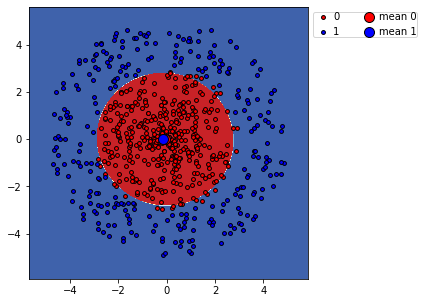

In [208]:
classifier.plot_decision_boundary(X_train,y_train,colors='rb')

##Problem 2


###Part 1

In [108]:
from pyparsing import col
mean= np.array([0,0])
cov=np.array([[3/2,1/2],[1/2,3/2]])
X = np.random.multivariate_normal(mean, cov, size=200)



(200, 2)


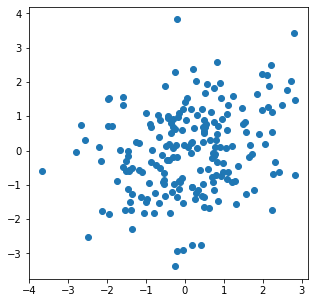

In [109]:
X=pd.DataFrame(X,columns=["X1","X2"])
print(X.shape)
plt.scatter(X["X1"],X["X2"])

In [110]:
def covariance_scratch(X,Y):
  mean_x=np.mean(X)
  mean_y=np.mean(Y)
  temp_X=X-mean_x
  temp_Y=Y-mean_y
  temp=np.multiply(temp_X,temp_Y)
  return sum(temp)/(len(temp)-1)

def cov_matrix(df):
  cov_mat=np.zeros((len(df.columns),len(df.columns)))
  for i in range(len(df.columns)):
    for j in range(len(df.columns)):
      cov_mat[i][j]=covariance_scratch(df[df.columns[i]].to_numpy(),df[df.columns[j]].to_numpy())
  return cov_mat






In [111]:
cov_mat=cov_matrix(X)

print("Covariance matrix is \n",cov_mat)
# print("\nMean matrix is \n",mean_mat)

Covariance matrix is 
 [[1.56698713 0.41968663]
 [0.41968663 1.53457157]]


In [112]:
eigen_val,eigen_vec=np.linalg.eig(cov_mat)
print(eigen_val,"\n",eigen_vec)

[1.97077883 1.13077988] 
 [[ 0.72062126 -0.69332892]
 [ 0.69332892  0.72062126]]


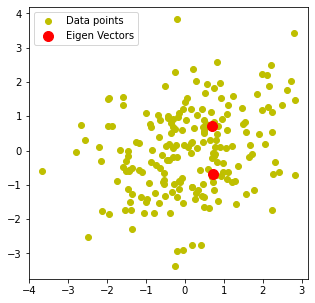

In [113]:
plt.scatter(X['X1'],X['X2'],color='y',label="Data points")
plt.scatter(eigen_vec[:,0],eigen_vec[:,1],color='r',s=100,label="Eigen Vectors")
plt.legend()
plt.show()

###Part 2

In [114]:
inv_cov=np.linalg.matrix_power(cov_mat,-1)
req_mat=sl.sqrtm(inv_cov)
req_mat


array([[ 0.82196251, -0.11394841],
       [-0.11394841,  0.83076361]])

In [115]:
Y=req_mat@(np.transpose(X.to_numpy()))
Y=np.transpose(Y)
Y=pd.DataFrame(Y,columns=['X1','X2'])
Y
# print(X.to_numpy())

,X1,X2
0,1.515749,0.174878
1,2.044867,-1.706845
2,0.362091,0.572483
3,0.765103,0.772565
4,-1.049761,-0.279234
...,...,...
195,-1.183242,-0.332105
196,-0.218787,-0.126462
197,-0.332779,-0.650394
198,0.982112,-0.633750


In [116]:
cov_mat_y=cov_matrix(Y)
cov_mat_y



array([[1.00000000e+00, 2.76718905e-16],
       [2.76718905e-16, 1.00000000e+00]])

####Comment on the covariance matrix of Y:
The obtained covariance matrix is nearly equal to identity matrix. The purpose of this transformation is to make the two variables ('X1' and 'X2') independent (since their covariance is nearly zero) so that we can apply naive bayes classifier on it (which assume the features to be independent)

###Part 3


In [160]:
def generate_datapoints(r,n):
  theta=np.random.uniform(0,2*np.pi,n)
  x = r * np.cos(theta)
  y = r * np.sin(theta)
  X = np.column_stack((x, y))
  return X

p=generate_datapoints(5,10)


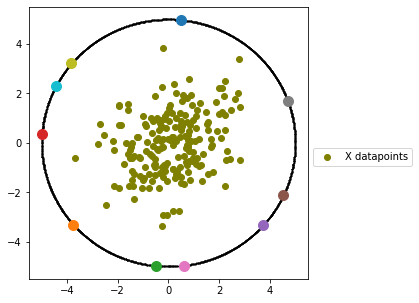

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [165]:
colors=list(mcolors.TABLEAU_COLORS.values() )
plt.rcParams['figure.figsize'] = [5, 5]
circle_points=generate_datapoints(5,10000)
plt.scatter(circle_points[:,0],circle_points[:,1],c='black',s=0.1)

for i in range(p.shape[0]):
  plt.scatter(p[i,0],p[i,1],color=colors[i],s=100)
plt.scatter(X["X1"],X["X2"],color=(0.5,0.5,0,1),label='X datapoints')
plt.legend( bbox_to_anchor=(1, 0.5))
plt.show()

print(list(mcolors.TABLEAU_COLORS.values() ))

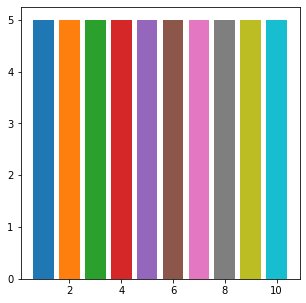

In [171]:
def euclid(x,y,x0,y0):
  dis=pow(x-x0,2)+pow(y-y0,2)
  dis=pow(dis,0.5)
  return dis

euclid_dis=[]
for x in p:
  euclid_dis.append(euclid(x[0],x[1],0,0))

def barplot(dis):
  for i in range(len(dis)):
    plt.bar(i+1,dis[i],color=colors[i])
  plt.show()

barplot(euclid_dis)

###Part 4

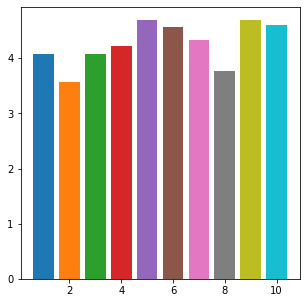

In [174]:
q=req_mat@(np.transpose(p))
q=np.transpose(q)


euclid_dis_q=[]
for x in q:
  euclid_dis_q.append(euclid(x[0],x[1],0,0))
barplot(euclid_dis_q)


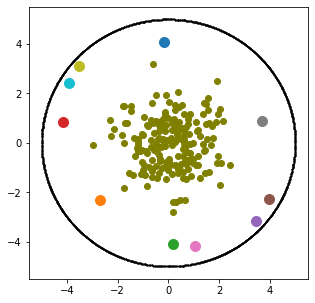

In [176]:
plt.scatter(circle_points[:,0],circle_points[:,1],c='black',s=0.1)
plt.scatter(Y['X1'],Y['X2'],color=(0.5,0.5,0,1))

for i,x in enumerate(q):
  plt.scatter(x[0],x[1],color=colors[i],s=100)

plt.show()
  
